In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', None)

In [2]:
# Reading The data
df = pd.read_csv('leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:

df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,61967152-6307-4387-9c1c-91100c320f46,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [6]:
# % of missing values

df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Data Cleaning
- dropping the columns added by the sales team: `{Tags, Lead Quality, Lead Profile, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, Last Notable Activity}`
- As they are totally based on the knowledge and intuitions of the sales team and will not help in model building



In [7]:
# Dropping columns added by Sales Team

team = ['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']
df.drop(columns=team,inplace=True)

In [8]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Data Quality check & Missing Value Treatment

###### 1. Lead Source - 0.38% missing vales

In [9]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
testone                 1
Name: Lead Source, dtype: int64

In [10]:
# Imputing 'Lead Source' with the mode value

df['Lead Source'].mode()

0    Google
dtype: object

In [11]:
df['Lead Source'].fillna(value=df['Lead Source'].mode()[0], inplace=True)

In [12]:
df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
testone                 1
Name: Lead Source, dtype: int64

In [13]:
df['Lead Source'].value_counts()/len(df['Lead Source'])*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Social Media          0.021645
Press_Release         0.021645
welearnblog_Home      0.010823
WeLearn               0.010823
youtubechannel        0.010823
Pay per Click Ads     0.010823
blog                  0.010823
NC_EDM                0.010823
testone               0.010823
Name: Lead Source, dtype: float64

#### Obervation:  
Values like Google, Direct Traffic, Olark Chat and Organic Search compuete for approx. 88% of "Lead Source'' column, so converting the rest of the values to 'Others'.

In [14]:
val = ['Reference','Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Social Media','Press_Release',
      'Live Chat','blog','testone','welearnblog_Home','WeLearn','youtubechannel','NC_EDM','Pay per Click Ads']

df['Lead Source'].replace(to_replace=val, value='Others',inplace=True)

In [15]:
df['Lead Source'].value_counts()/len(df['Lead Source'])*100

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Others             9.567100
Name: Lead Source, dtype: float64

In [16]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

###### 2. Total Visits  : 1.48% missing values

In [17]:
# Chesking the mean of 'TotalVisits'

df['TotalVisits'].mean()

3.445237833681204

In [18]:
# Checking the median value of 'TotalVisits'

df['TotalVisits'].median()

3.0

#### Outlier analysis

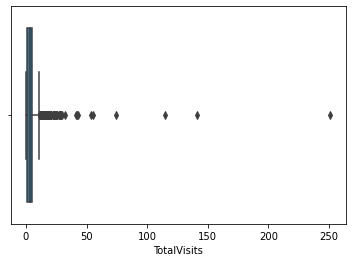

In [19]:
sns.boxplot(df['TotalVisits'])

In [20]:
df['TotalVisits'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

##### Observation: 
as the data is skewed so its better to impute the missing values with 'median'

In [21]:
df.TotalVisits.replace(to_replace=np.nan, value=df['TotalVisits'].median(),inplace=True)

#### Observation: 
we have to soft cap 'TotalVisits' to minimise the effect of outlier

In [22]:
q2 = df.TotalVisits.quantile(.99)
df['TotalVisits'][df['TotalVisits']>=q2] = q2

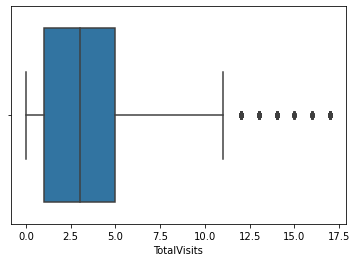

In [23]:
sns.boxplot(df['TotalVisits'])

###### 3. Country  : 26.63% missing value


In [24]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
South Africa               4
Sweden                     3
Asia/Pacific Region        2
Italy                      2
Philippines                2
Uganda                     2
Netherlands                2
China                      2
Ghana                      2
Bangladesh                 2
Belgium                    2
Tanzania                   1
Russia                     1
Malaysia                   1
Switzerland                1
Vietnam                    1
Denmark                    1
Liberia       

In [25]:
df.Country.value_counts()/len(df.Country)*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Nigeria                  0.043290
Canada                   0.043290
Kuwait                   0.043290
Germany                  0.043290
South Africa             0.043290
Sweden                   0.032468
Asia/Pacific Region      0.021645
Italy                    0.021645
Philippines              0.021645
Uganda                   0.021645
Netherlands              0.021645
China                    0.021645
Ghana                    0.021645
Bangladesh               0.021645
Belgium                  0.021645
Tanzania                 0.010823
Russia        

##### Obervation: 
Dropping this variable as its skewed

In [26]:
df.drop(columns='Country',inplace=True)

##### 4. Specialization  : 15.56% missing values  +  21.01% is Select

In [27]:
df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
df.Specialization.value_counts()/len(df.Specialization)*100

Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Observation: 
Replacing "select" as null-values then we can use this column for univariate/bivariate analysis and then remove it for model building

In [29]:
# Replacing 'Select' as NaN

df.Specialization.replace(to_replace="Select", value=np.nan,inplace=True)

In [30]:
df.Specialization.value_counts()/len(df.Specialization)*100

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

###### 5. How did you hear about X Education   :  23.88% missing values 

In [31]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [32]:
df['How did you hear about X Education'].value_counts()/len(df['How did you hear about X Education'])*100

Select                   54.577922
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

#### Observation:  
Its better to drop 'How did you hear about X Education' as it has 23.88% missing values  +  54.47% is Select

In [33]:
df.drop(columns='How did you hear about X Education',inplace=True)

##### 6. What is your current occupation   : 29.11% missing values

In [34]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [35]:
df['What is your current occupation'].value_counts()/len(df['What is your current occupation'])*100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

##### Observation: skewed data, So drop   ''What is your current occupation''

In [36]:
df.drop(columns='What is your current occupation',inplace=True)

##### 7. What matters most to you in choosing a course  :  29.31% missing values


In [37]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [38]:
df['What matters most to you in choosing a course'].value_counts()/len(df['What matters most to you in choosing a course'])*100

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

#### Observation: not so imp, so dropping this column

In [39]:
df.drop(columns='What matters most to you in choosing a course',inplace=True)

##### 8. City  :  `15.36% missing values` 


In [40]:
df.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [41]:
# Replacing 'Select' as NaN
df.City.replace(to_replace='Select',value=np.nan,inplace=True)

In [42]:
df.City.value_counts()/len(df.City)*100

Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

##### Observation: should drop this column as it has 40% missing values, even on imputaion with 'mode' it becomes skewed

In [43]:
# Dropping 'City'

df.drop(columns='City',inplace=True)

#### 9. Last Activity - 1.11% missing

In [44]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [45]:
df['Last Activity'].value_counts()/len(df['Last Activity'])*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

#### Observation: 
Imputing missing values with mode

In [46]:
df['Last Activity'].replace(to_replace=np.nan, value=df['Last Activity'].mode()[0], inplace=True)

#### 10. Page Views Per Visit  -  1.48% missing values

In [47]:
# computing the mean
df['Page Views Per Visit'].mean()

2.3628199494672093

In [48]:
# Computing the median
df['Page Views Per Visit'].median()

2.0

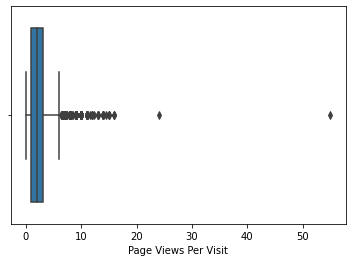

In [49]:
# cheking for outliers
sns.boxplot(df['Page Views Per Visit'])

In [50]:
df['Page Views Per Visit'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

##### Observation: 
the data is skewed so its better to impute the missing values with 'median'

In [51]:
df['Page Views Per Visit'].replace(to_replace=np.nan, value=df['Page Views Per Visit'].median(), inplace=True)

    - Outlier Analysis

#### Observation: we have to soft cap the data

In [52]:
# soft capping the data

q2 = df['Page Views Per Visit'].quantile(.99)
df['Page Views Per Visit'][df['Page Views Per Visit']>=q2] = q2

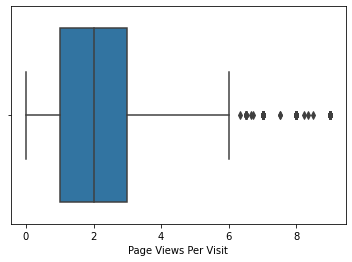

In [53]:
sns.boxplot(df['Page Views Per Visit'])

#### 11. Total Time Spent on Website  

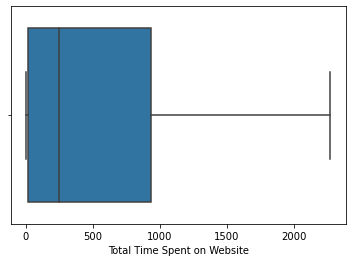

In [54]:
sns.boxplot(df['Total Time Spent on Website'])

##### Observation: no outliers

In [55]:
# Checking for null values

df.isnull().mean()*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page Views Per Visit                         0.000000
Last Activity                                0.000000
Specialization                              36.580087
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [57]:
df.shape

(9240, 24)

In [58]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,No,No,No,No,No,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,No,No,No,No,No,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,No,No,No,No,No,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No,No,No,No,No,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,No,No,No,No,No,No,No,No,No,No,No,No


## Univariate Analysis

#### 1. Numerical Columns

In [59]:
#List of numerical columns for univariate analysis (excluding 'Lead Number' & Converted (Target variable))
numCols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
numCols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

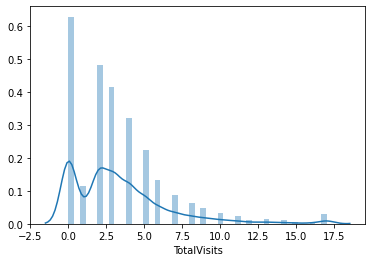

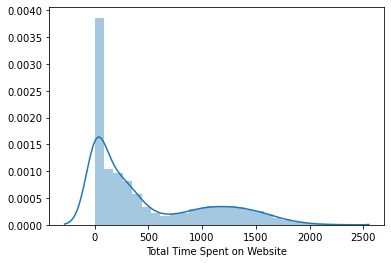

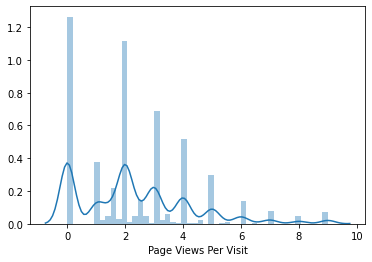

In [60]:
# Check the distribution of all numberical columns
for col in numCols:
    sns.distplot(df[col])
    plt.show()

### Analyzing numberical variables against Converted (Target) column values

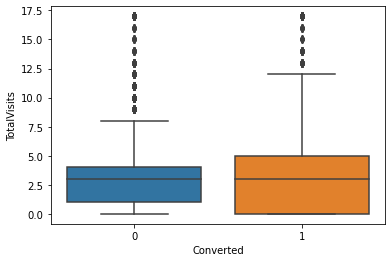

In [61]:
#TotalVisits
sns.boxplot(y = 'TotalVisits', x = "Converted", data = df)

#### Observation: 
TotalVisits variable has similar median for both converted and not converted.
Only the variance of converted is higher. This doesnt seem to make a great difference to conversions

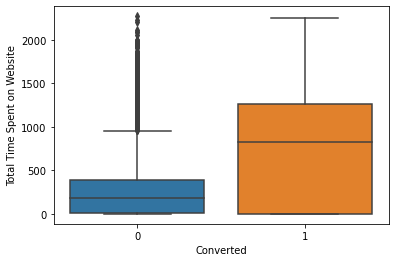

In [62]:
# Total Time Spent on Website
sns.boxplot(y = 'Total Time Spent on Website', x = "Converted", data = df)

#### Observation:
We are seeing a significant difference in the pattern of Total Time Spent on Website for Converted and not converted customers
Converted customers have a very high median time spent on website (approx 900) compared to not converted (approx 150)
This clearly shows that Converted customers spend much more time on internet. 
This column should be an important/significant independent variable in the model.

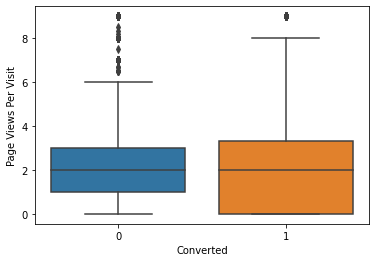

In [63]:
# Page Views Per Visit
sns.boxplot(y = 'Page Views Per Visit', x = "Converted", data = df)

#### Observation: 
Median of both converted and not converted customers are similar for Page Views Per Visit. However variance in case of Converted customers is higher.
Cant make much inference from this variable

###  Catagorical Columns analysis

In [64]:
#List of Catagorical columns for univariate analysis 
catCols = ['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
catCols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

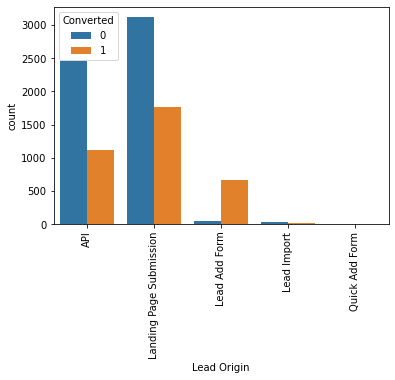

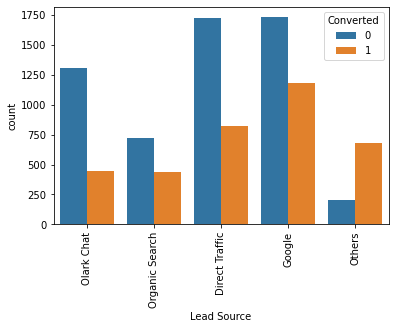

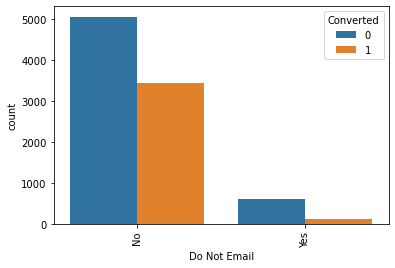

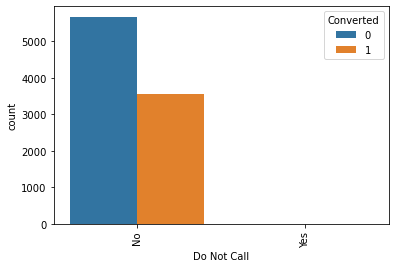

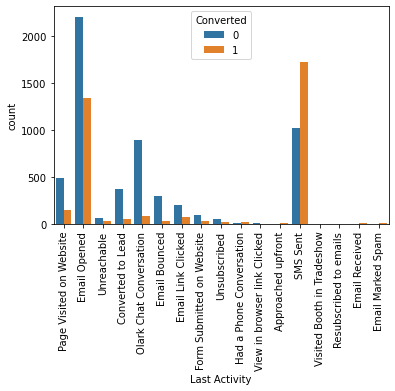

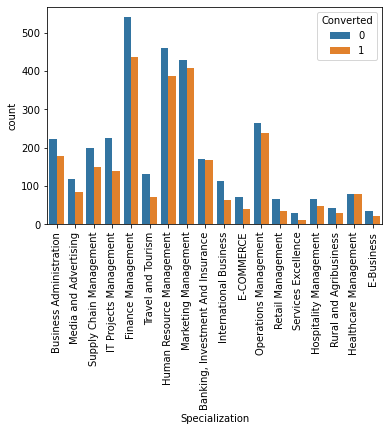

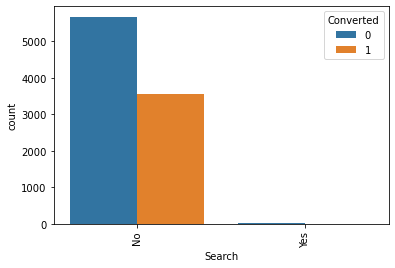

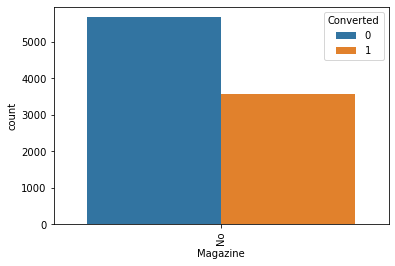

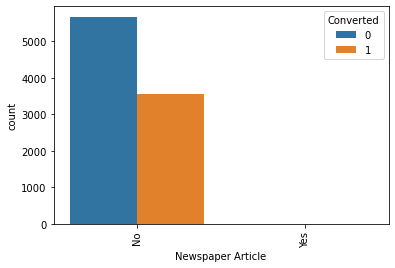

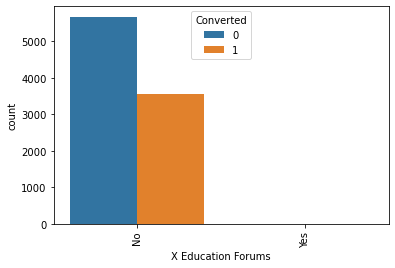

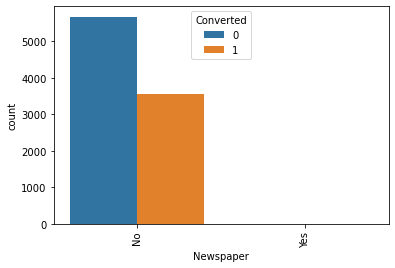

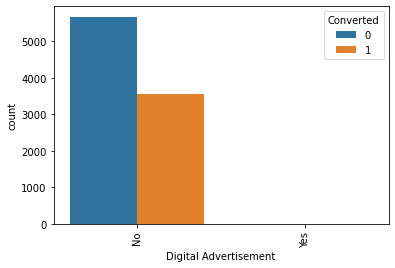

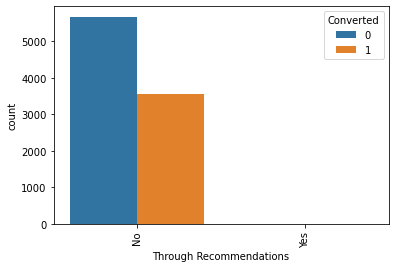

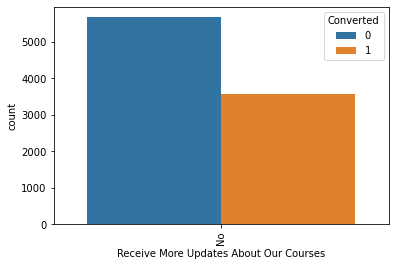

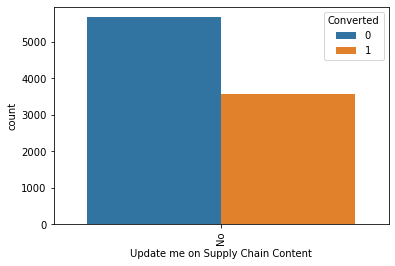

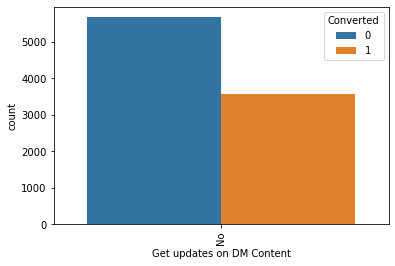

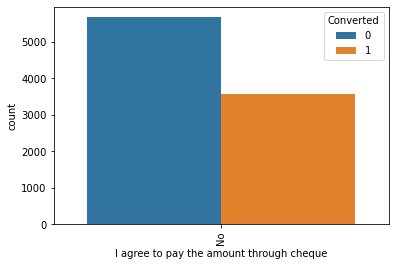

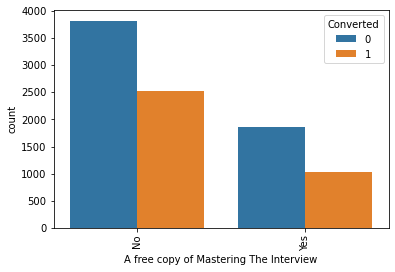

In [65]:
#How Catagoriacal variables behave for Target variable 'Converted' 
for col in catCols:
    sns.countplot(x = col, hue = "Converted", data = df)
    plt.xticks(rotation=90)
    plt.show()

#### Observations: 

- Behavior of different 'Lead Origin' values

Conversion rate from 'Lead add Form' is very high. Since we want to get the hot leads. This seems to be a good candidate for that.
However we see that the percentage of leads through 'Lead add Form' is low.

The company can take these actions based of these results:
1. Use marketing to increase leads through 'Lead add Form'
2. API and Landing Page Submission has very high percentage of leads but the coversion is low. 
Company may try to improve the lead conversion from these 2 Lead origins.

- Behavior of different 'Lead Source' values

Conversion rate for 'Others' is very high. 
Conversion rate for 'Google' is good and percentage of leads from 'Google's is also good.  
Company may focus on Google and 'others' sources of leads for better conversion.
'Organic search' also seems to have a good converion.

Olark Chat & Direct Traffice doesn't seem to perform very well in terms of conversion.

- Most of the specialization have similar Conversion ratio.
However few spicializations have better conversion like Healthcare management. More focus should be given on these specialization.
However percentage of leads with Healthcare management is very low

## Biltivariate & Multivariate Analysis

In [66]:
# Correlation between numerical columns
df[numCols].corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.324556,0.706203
Total Time Spent on Website,0.324556,1.000000,0.336715
Page Views Per Visit,0.706203,0.336715,1.000000


Here we see a good Correlation between TotalVisits and Page Views Per Visit
Other variables have very less correlation between them

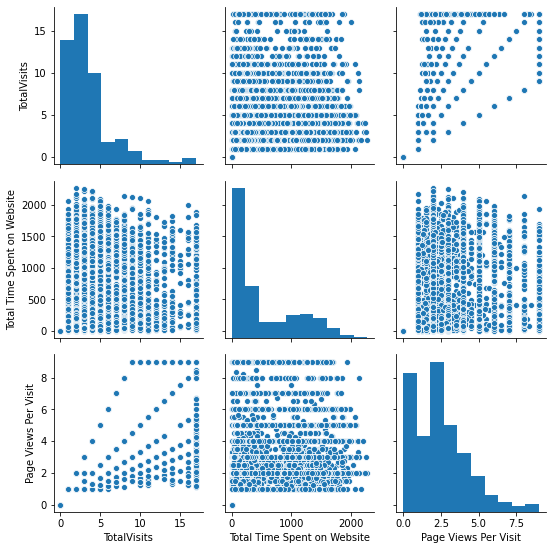

In [67]:
sns.pairplot(df[numCols])
plt.show()

We see some correlation between TotalVisits and Page Views Per visit

In [68]:
df.drop(columns='Specialization',inplace=True)

## Preparing the data

## Yes/No type columns

Do Not Email,  Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement,
Through Recommendations,  Receive More Updates About Our Courses,  Update me on Supply Chain Content,  
Get updates on DM Content,  I agree to pay the amount through cheque,  A free copy of Mastering The Interview

In [69]:
singleValueCols = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque']
singleValueCols

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [70]:
# Checking the count of each value in these Variables
tempList = []
for col in singleValueCols:
    tmp_series = df[col].value_counts()
    tmp_series.name = col
    tempList.append(tmp_series)
df_counts = pd.concat(tempList, axis=1)
df_counts

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque
No,9226,9240.0,9238,9239,9239,9236,9233,9240.0,9240.0,9240.0,9240.0
Yes,14,NaN,2,1,1,4,7,NaN,NaN,NaN,NaN


#### Observation:
These Columns have only Single values. These are of No use in the model. Dropping all these columns

In [71]:
df.drop(columns=singleValueCols,inplace=True)

In [72]:
# Converting binary variables (Yes/No) to 1/0

ynList = ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

def binaryMap(x):
    return x.map({'Yes':1, 'No':0})

df[ynList] = df[ynList].apply(binaryMap)

In [73]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0


In [74]:
df.shape

(9240, 12)

## Categorical Columns
Lead Origin,  Lead Source,  Last Activity,  

### 1. Lead Origin

In [75]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [76]:
# Creating Dummies for 'Lead Origin'

lo = pd.get_dummies(df['Lead Origin'], prefix='Lead Origin')
lo1 = lo.drop(columns='Lead Origin_Quick Add Form')
lo1

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
9235,0,1,0,0
9236,0,1,0,0
9237,0,1,0,0
9238,0,1,0,0


In [77]:
# Adding the result to main data

df = pd.concat([df,lo1], axis=1)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,1,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,0,0,1,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,1,0,1,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,1,0,1,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,0,0,1,0,0


### 2. Lead Source

In [78]:
df['Lead Source'].value_counts()

Google            2904
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Others             884
Name: Lead Source, dtype: int64

In [79]:
# Creating Dummies for 'Lead Source'

ls = pd.get_dummies(df['Lead Source'], prefix='Lead Source')
ls1 = ls.drop(columns='Lead Source_Others')
ls1

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
9235,1,0,0,0
9236,1,0,0,0
9237,1,0,0,0
9238,0,1,0,0


In [80]:
# Adding the result to main data

df = pd.concat([df,ls1], axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,1,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,1,0,1,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,1,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,1,0,0,0,1,0,0


### 3. Last Activity

In [81]:
df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [82]:
# Creating dummies for 'Last Activity'

la = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
la1 = la.drop(columns='Last Activity_Visited Booth in Tradeshow')
la1

,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [83]:
# Adding the result to main data

df= pd.concat([df,la1],axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dropping repeated columns
- Lead origin
- Lead Source,
- Last Activity,

In [84]:
df.drop(columns=['Lead Origin','Lead Source','Last Activity'],inplace=True)
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
df.shape

(9240, 33)

In [86]:
#df.describe()

## Train-Test Split

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df.drop(['Prospect ID','Converted'],axis=1)
X.set_index('Lead Number',inplace=True)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
660727,0,0,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
660681,0,0,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# Target variable
y = df[['Lead Number','Converted']]
y.set_index('Lead Number',inplace=True)
y.head()

,Converted
Lead Number,
660737,0
660728,0
660727,1
660719,0
660681,1


In [90]:
# Splitting teh data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
# Scaling the numerical variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
641410,0,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
597687,0,0,0.205373,0.005716,-0.503379,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
626825,0,0,0.512365,-0.691418,0.092260,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
587928,0,0,0.512365,1.365219,1.364995,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
622366,0,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [94]:
### Checking the Coversion Rate
cr = (sum(df['Converted'])/len(df['Converted'].index))*100
cr

38.53896103896104

## Model Building

#### Model 1


In [95]:
import statsmodels.api as sm

In [96]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2889.4
Date:                Mon, 08 Feb 2021   Deviance:                       5778.8
Time:                        21:07:11   Pearson chi2:                 6.74e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.5274   6.82e+04   7.74e-06      1.000   -1.34e+05    1.34e+05
Do Not Email                                  -1.2179      0.201     -6.073      0.000      -1.611      -0.825
Do Not Call                                   21.7793   3.27e+04      0.001      0.999   -6.41e+04    6.41e+04
TotalVisits                                    0.2933      0.047      6.283      0.000       0.202       0.385
Total Time Spent on Website                    1.0949      0.038     28.581      0.000       1.020       1.170
Page Views Per Visit                          -0.2313      0.052     -4.419      0.000      -0.334      -0.129
A free copy of Mastering The Interview        -0.0243      0.100     -0.244      0.807      -0.220       0.171
Lead Origin_API                              -22.2083   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission          -22.2823   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                    -18.4194   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Import                      -22.7708   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Direct Traffic                    -0.2685      0.252     -1.067      0.286      -0.762       0.225
Lead Source_Google                             0.0214      0.239      0.090      0.928      -0.447       0.490
Lead Source_Olark Chat                         0.9137      0.260      3.519      0.000       0.405       1.422
Lead Source_Organic Search                    -0.1486      0.252     -0.590      0.555      -0.643       0.345
Last Activity_Approached upfront              42.5097   5.06e+04      0.001      0.999   -9.92e+04    9.93e+04
Last Activity_Converted to Lead               19.5820   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Email Bounced                   19.7552   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Email Link Clicked              20.2083   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Email Marked Spam               42.7014   6.82e+04      0.001      1.000   -1.34e+05    1.34e+05
Last Activity_Email Opened                    20.7381   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Email Received                  43.1590   5.85e+04      0.001      0.999   -1.15e+05    1.15e+05
Last Activity_Form Submitted on Website       20.1225   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Had a Phone Conversation        22.8152   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Olark Chat Conversation         19.1539   4.82e+04      0.000      1.000

## Feature Selection Using RFE

In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [98]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 9),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Last Activity_Approached upfront', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Marked Spam', False, 2),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Email Received', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Co

In [100]:
col = X_train.columns[rfe.support_]

col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Last Activity_Approached upfront',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

In [101]:
# Columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked'],
      dtype='object')

#### Model 2

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.9
Date:                Mon, 08 Feb 2021   Deviance:                       5833.9
Time:                        21:07:12   Pearson chi2:                 6.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      21.3209   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Do Not Email                               -1.2320      0.198     -6.229      0.000      -1.620      -0.844
Do Not Call                                21.9238   3.35e+04      0.001      0.999   -6.56e+04    6.57e+04
Total Time Spent on Website                 1.1030      0.038     29.013      0.000       1.028       1.178
Lead Origin_API                           -22.2778   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission       -22.4892   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                 -18.4818   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Import                   -22.8193   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                      0.9259      0.115      8.079      0.000       0.701       1.151
Last Activity_Approached upfront           21.7067   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
Last Activity_Converted to Lead            -1.2500      0.206     -6.081      0.000      -1.653      -0.847
Last Activity_Email Bounced                -1.0206      0.348     -2.937      0.003      -1.702      -0.339
Last Activity_Email Link Clicked           -0.5425      0.207     -2.622      0.009      -0.948      -0.137
Last Activity_Email Received               22.7353   3.31e+04      0.001      0.999   -6.48e+04    6.48e+04
Last Activity_Form Submitted on Website    -0.5271      0.314     -1.676      0.094      -1.143       0.089
Last Activity_Had a Phone Conversation      2.1839      0.644      3.391      0.001       0.922       3.446
Last Activity_Olark Chat Conversation      -1.5636      0.161     -9.695      0.000      -1.880      -1.247
Last Activity_Page Visited on Website      -0.5164      0.140     -3.701      0.000      -0.790      -0.243
Last Activity_Resubscribed to emails       23.5736   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                      1.1141      0.074     14.961      0.000       0.968       1.260
Last Activity_Unsubscribed                  0.5706      0.471      1.211      0.226      -0.353       1.494
===========================================================================================================
"""

### Checking VIF

In [103]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_API,2.62
7,Lead Source_Olark Chat,2.40
0,Do Not Email,2.14
10,Last Activity_Email Bounced,1.98
4,Lead Origin_Landing Page Submission,1.89
18,Last Activity_SMS Sent,1.83
15,Last Activity_Olark Chat Conversation,1.53
2,Total Time Spent on Website,1.24
16,Last Activity_Page Visited on Website,1.24
5,Lead Origin_Lead Add Form,1.17


In [105]:
# Dropping 'Lead Origin_API' based on p-value > 0.05

col = col.drop('Lead Origin_API', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

#### Model 3

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2917.5
Date:                Mon, 08 Feb 2021   Deviance:                       5835.0
Time:                        21:07:12   Pearson chi2:                 6.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9556      0.082    -11.613      0.000      -1.117      -0.794
Do Not Email                               -1.2303      0.198     -6.222      0.000      -1.618      -0.843
Do Not Call                                21.9237   3.35e+04      0.001      0.999   -6.56e+04    6.57e+04
Total Time Spent on Website                 1.1044      0.038     29.069      0.000       1.030       1.179
Lead Origin_Landing Page Submission        -0.2138      0.085     -2.510      0.012      -0.381      -0.047
Lead Origin_Lead Add Form                   3.7941      0.188     20.228      0.000       3.426       4.162
Lead Origin_Lead Import                    -0.5426      0.524     -1.035      0.300      -1.570       0.485
Lead Source_Olark Chat                      0.9254      0.115      8.075      0.000       0.701       1.150
Last Activity_Approached upfront           21.7066   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
Last Activity_Converted to Lead            -1.2505      0.206     -6.082      0.000      -1.654      -0.848
Last Activity_Email Bounced                -0.9866      0.343     -2.880      0.004      -1.658      -0.315
Last Activity_Email Link Clicked           -0.5423      0.207     -2.621      0.009      -0.948      -0.137
Last Activity_Email Received               22.7353   3.31e+04      0.001      0.999   -6.48e+04    6.48e+04
Last Activity_Form Submitted on Website    -0.5273      0.315     -1.676      0.094      -1.144       0.089
Last Activity_Had a Phone Conversation      2.1844      0.644      3.392      0.001       0.922       3.447
Last Activity_Olark Chat Conversation      -1.5639      0.161     -9.696      0.000      -1.880      -1.248
Last Activity_Page Visited on Website      -0.5168      0.140     -3.703      0.000      -0.790      -0.243
Last Activity_Resubscribed to emails       23.5741   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                      1.1143      0.074     14.961      0.000       0.968       1.260
Last Activity_Unsubscribed                  0.5690      0.471      1.208      0.227      -0.354       1.492
===========================================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,2.14
9,Last Activity_Email Bounced,1.94
3,Lead Origin_Landing Page Submission,1.69
6,Lead Source_Olark Chat,1.62
17,Last Activity_SMS Sent,1.57
14,Last Activity_Olark Chat Conversation,1.40
2,Total Time Spent on Website,1.23
15,Last Activity_Page Visited on Website,1.17
18,Last Activity_Unsubscribed,1.15
4,Lead Origin_Lead Add Form,1.15


In [108]:
# Dropping 'Last Activity_Resubscribed to emails' based on p-value

col = col.drop('Last Activity_Resubscribed to emails', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

#### Model 4

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2918.8
Date:                Mon, 08 Feb 2021   Deviance:                       5837.6
Time:                        21:07:12   Pearson chi2:                 6.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9546      0.082    -11.603      0.000      -1.116      -0.793
Do Not Email                               -1.2302      0.198     -6.222      0.000      -1.618      -0.843
Do Not Call                                21.9252   3.35e+04      0.001      0.999   -6.56e+04    6.57e+04
Total Time Spent on Website                 1.1043      0.038     29.065      0.000       1.030       1.179
Lead Origin_Landing Page Submission        -0.2139      0.085     -2.511      0.012      -0.381      -0.047
Lead Origin_Lead Add Form                   3.7938      0.188     20.227      0.000       3.426       4.161
Lead Origin_Lead Import                    -0.5431      0.524     -1.036      0.300      -1.570       0.484
Lead Source_Olark Chat                      0.9296      0.115      8.115      0.000       0.705       1.154
Last Activity_Approached upfront           21.7030   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
Last Activity_Converted to Lead            -1.2514      0.206     -6.086      0.000      -1.654      -0.848
Last Activity_Email Bounced                -0.9881      0.343     -2.884      0.004      -1.660      -0.317
Last Activity_Email Link Clicked           -0.5447      0.207     -2.633      0.008      -0.950      -0.139
Last Activity_Email Received               22.7345   3.31e+04      0.001      0.999   -6.48e+04    6.48e+04
Last Activity_Form Submitted on Website    -0.5287      0.315     -1.681      0.093      -1.145       0.088
Last Activity_Had a Phone Conversation      2.1834      0.644      3.390      0.001       0.921       3.446
Last Activity_Olark Chat Conversation      -1.5678      0.161     -9.723      0.000      -1.884      -1.252
Last Activity_Page Visited on Website      -0.5180      0.140     -3.712      0.000      -0.792      -0.244
Last Activity_SMS Sent                      1.1127      0.074     14.943      0.000       0.967       1.259
Last Activity_Unsubscribed                  0.5674      0.471      1.204      0.228      -0.356       1.491
===========================================================================================================
"""

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,2.14
9,Last Activity_Email Bounced,1.94
3,Lead Origin_Landing Page Submission,1.69
6,Lead Source_Olark Chat,1.62
16,Last Activity_SMS Sent,1.57
14,Last Activity_Olark Chat Conversation,1.40
2,Total Time Spent on Website,1.23
15,Last Activity_Page Visited on Website,1.17
4,Lead Origin_Lead Add Form,1.15
17,Last Activity_Unsubscribed,1.15


In [111]:
# Dropping 'Last Activity_Email Received' based on p-value

col = col.drop('Last Activity_Email Received', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

#### Model 5

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2920.4
Date:                Mon, 08 Feb 2021   Deviance:                       5840.7
Time:                        21:07:13   Pearson chi2:                 6.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9535      0.082    -11.590      0.000      -1.115      -0.792
Do Not Email                               -1.2304      0.198     -6.223      0.000      -1.618      -0.843
Do Not Call                                21.9244   3.35e+04      0.001      0.999   -6.56e+04    6.56e+04
Total Time Spent on Website                 1.1049      0.038     29.082      0.000       1.030       1.179
Lead Origin_Landing Page Submission        -0.2118      0.085     -2.487      0.013      -0.379      -0.045
Lead Origin_Lead Add Form                   3.7945      0.188     20.230      0.000       3.427       4.162
Lead Origin_Lead Import                    -0.5433      0.524     -1.037      0.300      -1.570       0.484
Lead Source_Olark Chat                      0.9302      0.115      8.121      0.000       0.706       1.155
Last Activity_Approached upfront           21.7011   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
Last Activity_Converted to Lead            -1.2542      0.206     -6.100      0.000      -1.657      -0.851
Last Activity_Email Bounced                -0.9908      0.343     -2.892      0.004      -1.662      -0.319
Last Activity_Email Link Clicked           -0.5468      0.207     -2.644      0.008      -0.952      -0.141
Last Activity_Form Submitted on Website    -0.5316      0.315     -1.690      0.091      -1.148       0.085
Last Activity_Had a Phone Conversation      2.1808      0.644      3.386      0.001       0.918       3.443
Last Activity_Olark Chat Conversation      -1.5693      0.161     -9.732      0.000      -1.885      -1.253
Last Activity_Page Visited on Website      -0.5209      0.140     -3.732      0.000      -0.794      -0.247
Last Activity_SMS Sent                      1.1101      0.074     14.914      0.000       0.964       1.256
Last Activity_Unsubscribed                  0.5650      0.471      1.199      0.230      -0.358       1.488
===========================================================================================================
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,2.14
9,Last Activity_Email Bounced,1.94
3,Lead Origin_Landing Page Submission,1.69
6,Lead Source_Olark Chat,1.62
15,Last Activity_SMS Sent,1.57
13,Last Activity_Olark Chat Conversation,1.40
2,Total Time Spent on Website,1.23
14,Last Activity_Page Visited on Website,1.17
16,Last Activity_Unsubscribed,1.15
4,Lead Origin_Lead Add Form,1.15


In [114]:
# Dropping 'Last Activity_Approached upfront' based on p-value

col = col.drop('Last Activity_Approached upfront', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

#### Model 6

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.7
Date:                Mon, 08 Feb 2021   Deviance:                       5845.3
Time:                        21:07:13   Pearson chi2:                 6.76e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9520      0.082    -11.572      0.000      -1.113      -0.791
Do Not Email                               -1.2307      0.198     -6.224      0.000      -1.618      -0.843
Do Not Call                                19.9234   1.23e+04      0.002      0.999   -2.41e+04    2.42e+04
Total Time Spent on Website                 1.1060      0.038     29.116      0.000       1.032       1.180
Lead Origin_Landing Page Submission        -0.2105      0.085     -2.472      0.013      -0.377      -0.044
Lead Origin_Lead Add Form                   3.7989      0.188     20.260      0.000       3.431       4.166
Lead Origin_Lead Import                    -0.5435      0.524     -1.037      0.300      -1.571       0.484
Lead Source_Olark Chat                      0.9358      0.115      8.172      0.000       0.711       1.160
Last Activity_Converted to Lead            -1.2573      0.206     -6.114      0.000      -1.660      -0.854
Last Activity_Email Bounced                -0.9947      0.343     -2.903      0.004      -1.666      -0.323
Last Activity_Email Link Clicked           -0.5510      0.207     -2.664      0.008      -0.956      -0.146
Last Activity_Form Submitted on Website    -0.5354      0.315     -1.701      0.089      -1.152       0.081
Last Activity_Had a Phone Conversation      2.1784      0.644      3.382      0.001       0.916       3.441
Last Activity_Olark Chat Conversation      -1.5744      0.161     -9.765      0.000      -1.890      -1.258
Last Activity_Page Visited on Website      -0.5243      0.140     -3.757      0.000      -0.798      -0.251
Last Activity_SMS Sent                      1.1067      0.074     14.873      0.000       0.961       1.253
Last Activity_Unsubscribed                  0.5616      0.471      1.192      0.233      -0.362       1.485
===========================================================================================================
"""

In [116]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,2.14
8,Last Activity_Email Bounced,1.94
3,Lead Origin_Landing Page Submission,1.69
6,Lead Source_Olark Chat,1.62
14,Last Activity_SMS Sent,1.57
12,Last Activity_Olark Chat Conversation,1.40
2,Total Time Spent on Website,1.23
13,Last Activity_Page Visited on Website,1.17
4,Lead Origin_Lead Add Form,1.15
15,Last Activity_Unsubscribed,1.15


In [117]:
# Dropping 'Do Not Call' based on p-value

col = col.drop('Do Not Call', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

#### Model 7

In [118]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2923.5
Date:                Mon, 08 Feb 2021   Deviance:                       5847.0
Time:                        21:07:13   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9510      0.082    -11.567      0.000      -1.112      -0.790
Do Not Email                               -1.2316      0.198     -6.225      0.000      -1.619      -0.844
Total Time Spent on Website                 1.1064      0.038     29.131      0.000       1.032       1.181
Lead Origin_Landing Page Submission        -0.2113      0.085     -2.482      0.013      -0.378      -0.044
Lead Origin_Lead Add Form                   3.8103      0.188     20.308      0.000       3.443       4.178
Lead Origin_Lead Import                    -0.5442      0.524     -1.038      0.299      -1.572       0.483
Lead Source_Olark Chat                      0.9337      0.114      8.157      0.000       0.709       1.158
Last Activity_Converted to Lead            -1.2579      0.206     -6.117      0.000      -1.661      -0.855
Last Activity_Email Bounced                -0.9957      0.343     -2.904      0.004      -1.668      -0.324
Last Activity_Email Link Clicked           -0.5520      0.207     -2.667      0.008      -0.958      -0.146
Last Activity_Form Submitted on Website    -0.5359      0.315     -1.702      0.089      -1.153       0.081
Last Activity_Had a Phone Conversation      2.1779      0.644      3.380      0.001       0.915       3.441
Last Activity_Olark Chat Conversation      -1.5647      0.160     -9.758      0.000      -1.879      -1.250
Last Activity_Page Visited on Website      -0.5249      0.140     -3.760      0.000      -0.798      -0.251
Last Activity_SMS Sent                      1.1062      0.074     14.864      0.000       0.960       1.252
Last Activity_Unsubscribed                  0.5612      0.471      1.191      0.234      -0.363       1.485
===========================================================================================================
"""

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,2.14
7,Last Activity_Email Bounced,1.94
2,Lead Origin_Landing Page Submission,1.69
5,Lead Source_Olark Chat,1.62
13,Last Activity_SMS Sent,1.57
11,Last Activity_Olark Chat Conversation,1.40
1,Total Time Spent on Website,1.23
12,Last Activity_Page Visited on Website,1.17
3,Lead Origin_Lead Add Form,1.15
14,Last Activity_Unsubscribed,1.15


In [120]:
# Dropping 'Lead Origin_Lead Import' based on p-value

col = col.drop('Lead Origin_Lead Import', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

### Model 8

In [121]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2924.1
Date:                Mon, 08 Feb 2021   Deviance:                       5848.2
Time:                        21:07:13   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9650      0.081    -11.879      0.000      -1.124      -0.806
Do Not Email                               -1.2308      0.198     -6.220      0.000      -1.619      -0.843
Total Time Spent on Website                 1.1085      0.038     29.215      0.000       1.034       1.183
Lead Origin_Landing Page Submission        -0.1994      0.084     -2.362      0.018      -0.365      -0.034
Lead Origin_Lead Add Form                   3.8247      0.187     20.434      0.000       3.458       4.192
Lead Source_Olark Chat                      0.9479      0.114      8.332      0.000       0.725       1.171
Last Activity_Converted to Lead            -1.2531      0.206     -6.092      0.000      -1.656      -0.850
Last Activity_Email Bounced                -0.9944      0.343     -2.899      0.004      -1.667      -0.322
Last Activity_Email Link Clicked           -0.5485      0.207     -2.650      0.008      -0.954      -0.143
Last Activity_Form Submitted on Website    -0.5333      0.315     -1.694      0.090      -1.150       0.084
Last Activity_Had a Phone Conversation      2.1830      0.644      3.388      0.001       0.920       3.446
Last Activity_Olark Chat Conversation      -1.5608      0.160     -9.734      0.000      -1.875      -1.247
Last Activity_Page Visited on Website      -0.5213      0.140     -3.734      0.000      -0.795      -0.248
Last Activity_SMS Sent                      1.1076      0.074     14.887      0.000       0.962       1.253
Last Activity_Unsubscribed                  0.5641      0.472      1.196      0.232      -0.360       1.488
===========================================================================================================
"""

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,2.14
6,Last Activity_Email Bounced,1.94
2,Lead Origin_Landing Page Submission,1.69
4,Lead Source_Olark Chat,1.62
12,Last Activity_SMS Sent,1.57
10,Last Activity_Olark Chat Conversation,1.40
1,Total Time Spent on Website,1.23
11,Last Activity_Page Visited on Website,1.17
3,Lead Origin_Lead Add Form,1.15
13,Last Activity_Unsubscribed,1.15


In [123]:
# Dropping 'Last Activity_Unsubscribed' based on p-value

col = col.drop('Last Activity_Unsubscribed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent'],
      dtype='object')

### Model 9

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2924.8
Date:                Mon, 08 Feb 2021   Deviance:                       5849.6
Time:                        21:07:14   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9590      0.081    -11.831      0.000      -1.118      -0.800
Do Not Email                               -1.1475      0.183     -6.256      0.000      -1.507      -0.788
Total Time Spent on Website                 1.1089      0.038     29.224      0.000       1.035       1.183
Lead Origin_Landing Page Submission        -0.2004      0.084     -2.373      0.018      -0.366      -0.035
Lead Origin_Lead Add Form                   3.8250      0.187     20.428      0.000       3.458       4.192
Lead Source_Olark Chat                      0.9472      0.114      8.327      0.000       0.724       1.170
Last Activity_Converted to Lead            -1.2587      0.206     -6.121      0.000      -1.662      -0.856
Last Activity_Email Bounced                -1.0756      0.335     -3.206      0.001      -1.733      -0.418
Last Activity_Email Link Clicked           -0.5542      0.207     -2.678      0.007      -0.960      -0.149
Last Activity_Form Submitted on Website    -0.5407      0.315     -1.718      0.086      -1.158       0.076
Last Activity_Had a Phone Conversation      2.1709      0.642      3.379      0.001       0.912       3.430
Last Activity_Olark Chat Conversation      -1.5672      0.160     -9.780      0.000      -1.881      -1.253
Last Activity_Page Visited on Website      -0.5330      0.139     -3.829      0.000      -0.806      -0.260
Last Activity_SMS Sent                      1.0975      0.074     14.855      0.000       0.953       1.242
===========================================================================================================
"""

In [125]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.88
6,Last Activity_Email Bounced,1.82
2,Lead Origin_Landing Page Submission,1.68
4,Lead Source_Olark Chat,1.62
12,Last Activity_SMS Sent,1.55
10,Last Activity_Olark Chat Conversation,1.40
1,Total Time Spent on Website,1.22
11,Last Activity_Page Visited on Website,1.15
3,Lead Origin_Lead Add Form,1.14
5,Last Activity_Converted to Lead,1.06


In [126]:
# Dropping 'Last Activity_Form Submitted on Website'

col = col.drop('Last Activity_Form Submitted on Website', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent'],
      dtype='object')

### Model 10

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2926.4
Date:                Mon, 08 Feb 2021   Deviance:                       5852.7
Time:                        21:07:14   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9708      0.081    -12.010      0.000      -1.129      -0.812
Do Not Email                              -1.1503      0.183     -6.274      0.000      -1.510      -0.791
Total Time Spent on Website                1.1086      0.038     29.226      0.000       1.034       1.183
Lead Origin_Landing Page Submission       -0.2045      0.084     -2.423      0.015      -0.370      -0.039
Lead Origin_Lead Add Form                  3.8267      0.187     20.436      0.000       3.460       4.194
Lead Source_Olark Chat                     0.9476      0.114      8.325      0.000       0.725       1.171
Last Activity_Converted to Lead           -1.2439      0.205     -6.054      0.000      -1.647      -0.841
Last Activity_Email Bounced               -1.0589      0.335     -3.158      0.002      -1.716      -0.402
Last Activity_Email Link Clicked          -0.5412      0.207     -2.616      0.009      -0.947      -0.136
Last Activity_Had a Phone Conversation     2.1858      0.643      3.402      0.001       0.926       3.445
Last Activity_Olark Chat Conversation     -1.5554      0.160     -9.713      0.000      -1.869      -1.242
Last Activity_Page Visited on Website     -0.5181      0.139     -3.729      0.000      -0.790      -0.246
Last Activity_SMS Sent                     1.1120      0.073     15.137      0.000       0.968       1.256
==========================================================================================================
"""

In [128]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
641410    0.268026
597687    0.237040
626825    0.312243
587928    0.810011
622366    0.268026
613574    0.880986
628456    0.120852
588051    0.991439
649586    0.176089
592598    0.911335
dtype: float64

In [129]:
y_train

,Converted
Lead Number,
641410,0
597687,0
626825,0
587928,0
622366,0
...,...
656685,1
659710,1
588165,1


In [130]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26802581, 0.23704014, 0.31224293, 0.81001104, 0.26802581,
       0.88098594, 0.1208524 , 0.99143858, 0.17608914, 0.91133543])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [131]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.Converted, 'Con_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Con_Prob
Lead Number,,
641410,0,0.268026
597687,0,0.237040
626825,0,0.312243
587928,0,0.810011
622366,0,0.268026


##### Creating new column 'predicted' with 1 if Con_Prob > 0.5 else 0

In [132]:
y_train_pred_final['predicted'] = y_train_pred_final.Con_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Con_Prob,predicted
Lead Number,,,
641410,0,0.268026,0
597687,0,0.237040,0
626825,0,0.312243,0
587928,0,0.810011,1
622366,0,0.268026,0
613574,1,0.880986,1
628456,0,0.120852,0
588051,1,0.991439,1
649586,0,0.176089,0


### Confusion matrix 


In [133]:
from sklearn import metrics

In [134]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3504  498]
 [ 796 1670]]


In [135]:
# Predicted    not_converted  Converted
# Actual
# not_converted    3499      503
# Converted        791       1675 

In [136]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7999381570810142


## *Metrics beyond simply accuracy*
### - Sensitivity
 
### - Specificity 

In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('TP: ',TP,"\nTN: ", TN, "\nFP: ",FP,"\nFN: ",FN)

TP:  1670 
TN:  3504 
FP:  498 
FN:  796


In [138]:
# Let's see the sensitivity of our logistic regression model

sensitivity= TP / float(TP+FN)
sensitivity

0.6772100567721006

In [139]:
# Let us calculate specificity

specificity = TN / float(TN+FP)
specificity

0.8755622188905547

In [140]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.12443778110944528


In [141]:
# positive predictive value 

print (TP / float(TP+FP))

0.7702952029520295


In [142]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8148837209302325


### Plotting the ROC Curve

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Con_Prob, drop_intermediate = False )

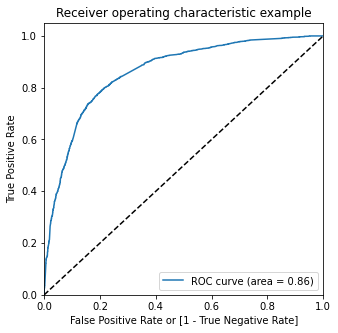

In [145]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Con_Prob)

###  Finding Optimal Cutoff Point

`Optimal cutoff probability is that prob where we get balanced sensitivity and specificity`

In [146]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Con_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Con_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Lead Number,,,,,,,,,,,,,
641410,0,0.268026,0,1,1,1,0,0,0,0,0,0,0
597687,0,0.237040,0,1,1,1,0,0,0,0,0,0,0
626825,0,0.312243,0,1,1,1,1,0,0,0,0,0,0
587928,0,0.810011,1,1,1,1,1,1,1,1,1,1,0
622366,0,0.268026,0,1,1,1,0,0,0,0,0,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.558905  0.978102  0.300600
0.2   0.2  0.713049  0.915247  0.588456
0.3   0.3  0.778602  0.826845  0.748876
0.4   0.4  0.798856  0.745337  0.831834
0.5   0.5  0.799938  0.677210  0.875562
0.6   0.6  0.774119  0.547445  0.913793
0.7   0.7  0.756030  0.460260  0.938281
0.8   0.8  0.729283  0.345904  0.965517
0.9   0.9  0.675015  0.167883  0.987506


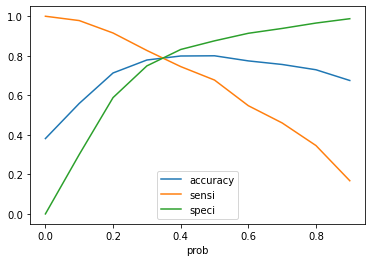

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [149]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Con_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Con_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
Lead Number,,,,,,,,,,,,,,
641410,0,0.268026,0,1,1,1,0,0,0,0,0,0,0,0
597687,0,0.237040,0,1,1,1,0,0,0,0,0,0,0,0
626825,0,0.312243,0,1,1,1,1,0,0,0,0,0,0,1
587928,0,0.810011,1,1,1,1,1,1,1,1,1,1,0,1
622366,0,0.268026,0,1,1,1,0,0,0,0,0,0,0,0


In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7786023500309215

In [151]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2997, 1005],
       [ 427, 2039]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
print('TP: ', TP,'\nTN: ',TN,"\nFP: ",FP,"\nFN: ",FN)

TP:  2039 
TN:  2997 
FP:  1005 
FN:  427


In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8268450932684509

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.7488755622188905

In [156]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.25112443778110943


In [157]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6698423127463863


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8752920560747663


## Precision and Recall

##### Precision
TP / TP + FP

In [159]:
precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
precision

0.6698423127463863

##### Recall
TP / TP + FN

In [160]:
recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
recall

0.8268450932684509

### F-1 Score:


### `F = 2 * ((precision * recall) / (precision + recall))`




In [161]:
f1 = 2*((precision*recall)/(precision+recall))
f1

0.74010889292196

## Making predictions on the test set

In [162]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [163]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,
619003,0,0.964504,0,0,0,0,0,0,0,0,0,1
636884,0,-0.885371,0,1,0,0,0,0,0,0,0,1
590281,0,-0.777416,0,0,0,0,0,0,0,0,0,0
579892,0,-0.885371,0,0,1,0,0,0,0,1,0,0
617929,0,-0.885371,0,1,0,0,0,0,0,0,0,0


In [164]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [165]:
y_test_pred = res.predict(X_test_sm)

In [166]:
y_test_pred[:10]

Lead Number
619003    0.770367
636884    0.951954
590281    0.137929
579892    0.071752
617929    0.866965
579992    0.548979
643289    0.474510
581637    0.196444
588474    0.062799
609001    0.327331
dtype: float64

In [167]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [169]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [170]:
y_pred_final.head()

,Converted,0
Lead Number,,
619003,1,0.770367
636884,1,0.951954
590281,1,0.137929
579892,0,0.071752
617929,1,0.866965


In [171]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Con_Prob'})

In [172]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted','Con_Prob'], axis=1)

In [173]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Con_Prob
Lead Number,,
619003,1,0.770367
636884,1,0.951954
590281,1,0.137929
579892,0,0.071752
617929,1,0.866965


In [174]:
y_pred_final['final_predicted'] = y_pred_final.Con_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [175]:
y_pred_final.head()

,Converted,Con_Prob,final_predicted
Lead Number,,,
619003,1,0.770367,1
636884,1,0.951954,1
590281,1,0.137929,0
579892,0,0.071752,0
617929,1,0.866965,1


In [176]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7857142857142857

In [177]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1265,  412],
       [ 182,  913]], dtype=int64)

In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8337899543378996

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.7543231961836613

## Adding Score to main dataframe

In [181]:
X_test['Score'] = y_pred_final.Con_Prob * 100

In [182]:
X_test['Lead Number'] = X_test.index

In [183]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Score,Lead Number
Lead Number,,,,,,,,,,,,,,
619003,0,0.964504,0,0,0,0,0,0,0,0,0,1,77.036748,619003
636884,0,-0.885371,0,1,0,0,0,0,0,0,0,1,95.195414,636884
590281,0,-0.777416,0,0,0,0,0,0,0,0,0,0,13.792872,590281
579892,0,-0.885371,0,0,1,0,0,0,0,1,0,0,7.175167,579892
617929,0,-0.885371,0,1,0,0,0,0,0,0,0,0,86.696498,617929


In [184]:
X_train['Score'] = y_train_pred_final.Con_Prob * 100

In [185]:
X_train['Lead Number'] = X_train.index

In [186]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Score,Lead Number
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
641410,0,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,26.802581,641410
597687,0,0,0.205373,0.005716,-0.503379,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23.704014,597687
626825,0,0,0.512365,-0.691418,0.092260,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31.224293,626825
587928,0,0,0.512365,1.365219,1.364995,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,81.001104,587928
622366,0,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,26.802581,622366


In [187]:
df_score_train = pd.DataFrame({'Score':X_train.Score})
df_score_train.reset_index()
df_score_train.head()

,Score
Lead Number,
641410,26.802581
597687,23.704014
626825,31.224293
587928,81.001104
622366,26.802581


In [188]:
df_score_test = pd.DataFrame({ 'Score':X_test.Score})

df_score_test.head()

,Score
Lead Number,
619003,77.036748
636884,95.195414
590281,13.792872
579892,7.175167
617929,86.696498


In [189]:
df_score_test.reset_index()

,Lead Number,Score
0,619003,77.036748
1,636884,95.195414
2,590281,13.792872
3,579892,7.175167
4,617929,86.696498
...,...,...
2767,583730,11.039697
2768,639134,95.195414
2769,595041,26.802581
2770,608916,36.271939


In [190]:
df_score = pd.concat([df_score_train, df_score_test])
df_score= df_score.reset_index()

In [191]:

df_score.head()

,Lead Number,Score
0,641410,26.802581
1,597687,23.704014
2,626825,31.224293
3,587928,81.001104
4,622366,26.802581


In [192]:
df_score.shape

(9240, 2)

In [193]:
df.shape

(9240, 33)

In [194]:
df1 = pd.merge(df, df_score, on ='Lead Number',how ='left') 
df1.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,17.905124
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.774844
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72.125120
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,17.680579
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.655475


### Final Remarks: 
- Based on the insights of the model 10, any lead having a score of 30+ can be considered as a Hot Lead.
- The model built was able to predict more than 80% of leads which were converted. Also, with the help of this model we can see that the attributes like ‘Total Time Spent on Website’, ‘Lead Origin’ and ‘Last Activity’ were among the top 3 to contribute towards the probability of lead conversion.